<a href="https://colab.research.google.com/github/FlyPig23/CSE5526/blob/main/CSE_5526_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate 200 data points by sampling (x1, x2) uniformly from ({-1,1}, {-1,1}). The target is determined by (|sinx1π| > |x2|).

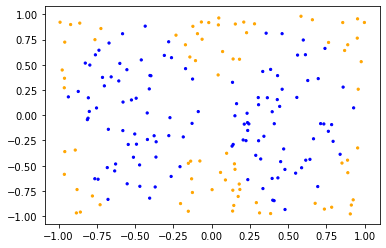

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(0)

# Randomly pick 200 points
npoints = 200
x1 = np.random.uniform(-1, 1, npoints)
x2 = np.random.uniform(-1, 1, npoints)

# Determine each point's label
target = np.where(np.absolute(np.sin(x1 * np.pi)) > np.absolute(x2), 1, 0)

# Assign labes to each point and display the data
colors = []
for i in range (npoints):
  if target[i] == 1:
    colors.append('blue')
  else:
    colors.append('orange')
plt.scatter(x1, x2, s = 5, c = colors)
plt.show()

Generate another 200 points as a separate test set.

In [ ]:
# Randomly pick 200 points
t1 = np.random.uniform(-1, 1, npoints)
t2 = np.random.uniform(-1, 1, npoints)

# Determine each point's desired label
test_target = np.where(np.absolute(np.sin(t1 * np.pi)) > np.absolute(t2), 1, 0)

Implement a two-layer perceptron with the backpropagation algorithm to model the training distribution.
This network uses 2 input elements, 6 hidden units for the first layer, and 1 output unit for the second layer.

In [ ]:
def sigmoid(x, a):
  return 1/(1 + np.exp(x * (-a)))

def sigmoid_derivative(x, a):
  return a * sigmoid(x, a) * (1 - sigmoid(x, a))

# Initialize all weights to random numbers between -0.1 and 0.1, including bias weights
# Weights between input and the first layer is denoted as weights_ji
# Weights between the first layer and the second layer is denoted as weights_kj
weights_ji = np.random.uniform(-0.1, 0.1, (6, 3))
weights_kj = np.random.uniform(-0.1, 0.1, (1, 7))
def backpropagation(input1, input2, desired_output, learning_rate):
  # Initialize the status value, and the epoch counter
  stop = False
  epoch = 0

  # Initialize all bias to random numbers between -0.1 and 0.1 and merge into the input array
  # Bias from input is denoted as bias_i
  # Bias from the first layer is denoted as bias_j
  bias_i = np.ones(npoints)
  bias_j = np.ones(npoints)
  all_input = np.vstack((bias_i, input1, input2))

  # Training process
  while not stop:
    a_sigmoid = 1
    # Compute values of the first layer
    y_j = sigmoid(np.dot(weights_ji, all_input), a_sigmoid)
    # Merge the first layer results with bias
    y_j_bias = np.vstack((bias_j, y_j))
    # Compute actual output
    y_k = sigmoid(np.dot(weights_kj, y_j_bias), a_sigmoid)
    # Count epoch
    epoch += 1

    if epoch % 100 != 0:
      # Update weights
      for index in range(npoints):
        # Compute value of 
        phi_derivative_k = sigmoid_derivative(np.dot(weights_kj, y_j_bias[:,index]), a_sigmoid)
        error = desired_output[index] - y_k[:,index]
        # Update weights for the second layer
        for j in range(weights_kj.size):
          weights_kj[0,j] = weights_kj[0,j] + learning_rate * phi_derivative_k * error * y_j_bias[j,index]
        # Update weights for the first layer
        for j in range(weights_ji.shape[0]):
          for i in range(weights_ji.shape[1]):
            phi_derivative_j = sigmoid_derivative(np.dot(weights_ji[j,:], all_input[:,index]), a_sigmoid)
            weights_ji[j,i] = weights_ji[j,i] + learning_rate * phi_derivative_j * np.inner(weights_kj[0,j], phi_derivative_k * error) * all_input[i,index]
    else:
      # Compute the Mean Square Error after each 100 epochs
      mean_sqaure_loss = np.sum((desired_output - y_k) ** 2) / npoints
      print('After', epoch, 'epochs, the Mean Square Error is ', mean_sqaure_loss)
      # Determine whether to continue training
      print('Do you want to stop? Enter \'y\' to stop, others to continue.')
      instruction = input()
      if instruction == 'y':
        stop = True
      else:
        stop = False
        # Learning rate annealing
        learning_rate *= 0.8

  return weights_ji, weights_kj

Track the loss on the entire training set every 100 epochs.

In [ ]:
weights_ji, weights_kj = backpropagation(x1, x2, target, 0.5)

After 100 epochs, the Mean Square Error is  0.3878239522908495
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 200 epochs, the Mean Square Error is  0.5601221795252772
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 300 epochs, the Mean Square Error is  0.37140853678249786
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 400 epochs, the Mean Square Error is  0.34835700082208754
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 500 epochs, the Mean Square Error is  0.4014251505339464
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 600 epochs, the Mean Square Error is  0.17252560701537548
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 700 epochs, the Mean Square Error is  0.17838842274443376
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 800 epochs, the Mean Square Error is  0.11184428657176454
Do you want to stop? Enter 'y' to stop, others to continu

Report the classification error on the test set.

In [ ]:
from sklearn.metrics import classification_report

# Initialize all bias to random numbers between -0.1 and 0.1 and merge into the input array
# Bias from input is denoted as bias_i
# Bias from the first layer is denoted as bias_j
bias_i = np.ones(npoints)
bias_j = np.ones(npoints)
all_test_input = np.vstack((bias_i, t1, t2))

# Compute values of the first layer
test_a_sigmoid = 1
y_j_test = sigmoid(np.dot(weights_ji, all_test_input), test_a_sigmoid)
# Merge the first layer results with bias
y_j_bias_test = np.vstack((bias_j, y_j_test))
# Compute actual output
y_k_test = sigmoid(np.dot(weights_kj, y_j_bias_test), test_a_sigmoid)
# Convert results to 0/1 labels
test_predicted_target = np.where(y_k_test > 0.5, 1, 0)

# Print the classification report
print(classification_report(test_target.reshape(200,), test_predicted_target.reshape(200,)))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76        79
           1       0.85      0.81      0.83       121

    accuracy                           0.80       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.80      0.80       200



Plot the hyperplanes learned in the first layer of network on the training data.

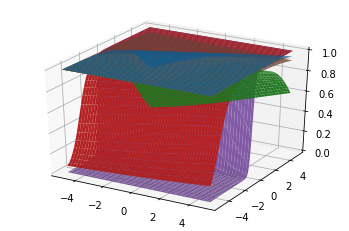

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5,5,200)
y = np.linspace(-5,5,200)
z = np.linspace(-5,5,200)

X,Y = np.meshgrid(x,y)
Z1 = sigmoid(weights_ji[0,0] + weights_ji[0,1] * X + weights_ji[0,2] * Y, 1)
Z2 = sigmoid(weights_ji[1,0] + weights_ji[1,1] * X + weights_ji[1,2] * Y, 1)
Z3 = sigmoid(weights_ji[2,0] + weights_ji[2,1] * X + weights_ji[2,2] * Y, 1)
Z4 = sigmoid(weights_ji[3,0] + weights_ji[3,1] * X + weights_ji[3,2] * Y, 1)
Z5 = sigmoid(weights_ji[4,0] + weights_ji[4,1] * X + weights_ji[4,2] * Y, 1)
Z6 = sigmoid(weights_ji[5,0] + weights_ji[5,1] * X + weights_ji[5,2] * Y, 1)

new_figure = plt.figure()
ax = new_figure.add_subplot(111,projection='3d')
ax.plot_surface(X, Y, Z1)
ax.plot_surface(X, Y, Z2)
ax.plot_surface(X, Y, Z3)
ax.plot_surface(X, Y, Z4)
ax.plot_surface(X, Y, Z5)
ax.plot_surface(X, Y, Z6)
plt.show()

Vary the number of hidden units to 4, 8, 12, 20.  Report the effect on test classification error.

4 hidden units

In [ ]:
weights_ji = np.random.uniform(-0.1, 0.1, (4, 3))
weights_kj = np.random.uniform(-0.1, 0.1, (1, 5))
weights_ji, weights_kj = backpropagation(x1, x2, target, 0.5)
# Compute values of the first layer
test_a_sigmoid = 1
y_j_test = sigmoid(np.dot(weights_ji, all_test_input), test_a_sigmoid)
# Merge the first layer results with bias
y_j_bias_test = np.vstack((bias_j, y_j_test))
# Compute actual output
y_k_test = sigmoid(np.dot(weights_kj, y_j_bias_test), test_a_sigmoid)
# Convert results to 0/1 labels
test_predicted_target = np.where(y_k_test > 0.5, 1, 0)
print(classification_report(test_target.reshape(200,), test_predicted_target.reshape(200,)))

After 100 epochs, the Mean Square Error is  0.383130613515769
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 200 epochs, the Mean Square Error is  0.4127174519417683
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 300 epochs, the Mean Square Error is  0.21039963368901277
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 400 epochs, the Mean Square Error is  0.20530867629944224
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 500 epochs, the Mean Square Error is  0.20639243685145778
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 600 epochs, the Mean Square Error is  0.20557268177735666
Do you want to stop? Enter 'y' to stop, others to continue.
y
              precision    recall  f1-score   support

           0       0.61      0.85      0.71        79
           1       0.87      0.64      0.74       121

    accuracy                           0.73       200
   macro avg       0.74      

8 hidden units

In [ ]:
weights_ji = np.random.uniform(-0.1, 0.1, (8, 3))
weights_kj = np.random.uniform(-0.1, 0.1, (1, 9))
weights_ji, weights_kj = backpropagation(x1, x2, target, 0.5)
# Compute values of the first layer
test_a_sigmoid = 1
y_j_test = sigmoid(np.dot(weights_ji, all_test_input), test_a_sigmoid)
# Merge the first layer results with bias
y_j_bias_test = np.vstack((bias_j, y_j_test))
# Compute actual output
y_k_test = sigmoid(np.dot(weights_kj, y_j_bias_test), test_a_sigmoid)
# Convert results to 0/1 labels
test_predicted_target = np.where(y_k_test > 0.5, 1, 0)
print(classification_report(test_target.reshape(200,), test_predicted_target.reshape(200,)))

After 100 epochs, the Mean Square Error is  0.5700358066276431
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 200 epochs, the Mean Square Error is  0.4661328510139145
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 300 epochs, the Mean Square Error is  0.24963093360291025
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 400 epochs, the Mean Square Error is  0.20728878972990444
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 500 epochs, the Mean Square Error is  0.18137246230405368
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 600 epochs, the Mean Square Error is  0.15989737716922733
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 700 epochs, the Mean Square Error is  0.09287740892134914
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 800 epochs, the Mean Square Error is  0.07362285238731699
Do you want to stop? Enter 'y' to stop, others to contin

12 hidden units

In [ ]:
weights_ji = np.random.uniform(-0.1, 0.1, (12, 3))
weights_kj = np.random.uniform(-0.1, 0.1, (1, 13))
weights_ji, weights_kj = backpropagation(x1, x2, target, 0.5)
# Compute values of the first layer
test_a_sigmoid = 1
y_j_test = sigmoid(np.dot(weights_ji, all_test_input), test_a_sigmoid)
# Merge the first layer results with bias
y_j_bias_test = np.vstack((bias_j, y_j_test))
# Compute actual output
y_k_test = sigmoid(np.dot(weights_kj, y_j_bias_test), test_a_sigmoid)
# Convert results to 0/1 labels
test_predicted_target = np.where(y_k_test > 0.5, 1, 0)
print(classification_report(test_target.reshape(200,), test_predicted_target.reshape(200,)))

After 100 epochs, the Mean Square Error is  0.38876275104280805
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 200 epochs, the Mean Square Error is  0.37334587079880066
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 300 epochs, the Mean Square Error is  0.48598446971472137
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 400 epochs, the Mean Square Error is  0.27063662420578294
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 500 epochs, the Mean Square Error is  0.23377448333653156
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 600 epochs, the Mean Square Error is  0.2745766699429568
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 700 epochs, the Mean Square Error is  0.20456979706790196
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 800 epochs, the Mean Square Error is  0.15919498886072553
Do you want to stop? Enter 'y' to stop, others to conti

20 hidden units

In [ ]:
weights_ji = np.random.uniform(-0.1, 0.1, (20, 3))
weights_kj = np.random.uniform(-0.1, 0.1, (1, 21))
weights_ji, weights_kj = backpropagation(x1, x2, target, 0.5)
# Compute values of the first layer
test_a_sigmoid = 1
y_j_test = sigmoid(np.dot(weights_ji, all_test_input), test_a_sigmoid)
# Merge the first layer results with bias
y_j_bias_test = np.vstack((bias_j, y_j_test))
# Compute actual output
y_k_test = sigmoid(np.dot(weights_kj, y_j_bias_test), test_a_sigmoid)
# Convert results to 0/1 labels
test_predicted_target = np.where(y_k_test > 0.5, 1, 0)
print(classification_report(test_target.reshape(200,), test_predicted_target.reshape(200,)))

After 100 epochs, the Mean Square Error is  0.59595165976905
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 200 epochs, the Mean Square Error is  0.42623939390354165
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 300 epochs, the Mean Square Error is  0.3888141773651638
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 400 epochs, the Mean Square Error is  0.4089641562075778
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 500 epochs, the Mean Square Error is  0.37155434766605433
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 600 epochs, the Mean Square Error is  0.377661241118399
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 700 epochs, the Mean Square Error is  0.34699476995236495
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 800 epochs, the Mean Square Error is  0.33425038110947597
Do you want to stop? Enter 'y' to stop, others to continue.
n

Include a momentum term in the weight update with alpha = 0.8, 0.9 and report its effect on the speed of training over no momentum.

In [ ]:
# Initialize all weights to random numbers between -0.1 and 0.1, including bias weights
# Weights between input and the first layer is denoted as weights_ji
# Weights between the first layer and the second layer is denoted as weights_kj
weights_ji = np.random.uniform(-0.1, 0.1, (6, 3))
weights_kj = np.random.uniform(-0.1, 0.1, (1, 7))
def backpropagation_momentum(input1, input2, desired_output, learning_rate, momentum):
  # Initialize the status value, and the epoch counter
  stop = False
  epoch = 0

  # Initialize all bias to random numbers between -0.1 and 0.1 and merge into the input array
  # Bias from input is denoted as bias_i
  # Bias from the first layer is denoted as bias_j
  bias_i = np.ones(npoints)
  bias_j = np.ones(npoints)
  all_input = np.vstack((bias_i, input1, input2))

  # Training process
  while not stop:
    a_sigmoid = 1
    # Compute values of the first layer
    y_j = sigmoid(np.dot(weights_ji, all_input), a_sigmoid)
    # Merge the first layer results with bias
    y_j_bias = np.vstack((bias_j, y_j))
    # Compute actual output
    y_k = sigmoid(np.dot(weights_kj, y_j_bias), a_sigmoid)
    # Count epoch
    epoch += 1

    if epoch % 100 != 0:
      # Update weights
      for index in range(npoints):
        # Compute value of 
        phi_derivative_k = sigmoid_derivative(np.dot(weights_kj, y_j_bias[:,index]), a_sigmoid)
        error = desired_output[index] - y_k[:,index]
        # Update weights for the second layer
        for j in range(weights_kj.size):
          weights_kj[0,j] = weights_kj[0,j] + (learning_rate / (1 - momentum)) * phi_derivative_k * error * y_j_bias[j,index]
        # Update weights for the first layer
        for j in range(weights_ji.shape[0]):
          for i in range(weights_ji.shape[1]):
            phi_derivative_j = sigmoid_derivative(np.dot(weights_ji[j,:], all_input[:,index]), a_sigmoid)
            weights_ji[j,i] = weights_ji[j,i] + (learning_rate / (1 - momentum)) * phi_derivative_j * np.inner(weights_kj[0,j], phi_derivative_k * error) * all_input[i,index]
    else:
      # Compute the Mean Square Error after each 100 epochs
      mean_sqaure_loss = np.sum((desired_output - y_k) ** 2) / npoints
      print('After', epoch, 'epochs, the Mean Square Error is ', mean_sqaure_loss)
      # Determine whether to continue training
      print('Do you want to stop? Enter \'y\' to stop, others to continue.')
      instruction = input()
      if instruction == 'y':
        stop = True
      else:
        stop = False
        # Learning rate annealing
        learning_rate *= 0.8

  return weights_ji, weights_kj

In [ ]:
weights_ji, weights_kj = backpropagation_momentum(x1, x2, target, 0.5, 0.8)

After 100 epochs, the Mean Square Error is  0.6049682868658439
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 200 epochs, the Mean Square Error is  0.6049828833564631
Do you want to stop? Enter 'y' to stop, others to continue.
y


In [ ]:
weights_ji, weights_kj = backpropagation_momentum(x1, x2, target, 0.5, 0.9)

After 100 epochs, the Mean Square Error is  0.6049803327774391
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 200 epochs, the Mean Square Error is  0.6046328845788921
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 300 epochs, the Mean Square Error is  0.6049926428144008
Do you want to stop? Enter 'y' to stop, others to continue.
n
After 400 epochs, the Mean Square Error is  0.39378247015894885
Do you want to stop? Enter 'y' to stop, others to continue.
y
